# EDA on Avocado

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Data Preparation
Load data

In [2]:
df =  pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


## Missing value checking

In [4]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Dropping unncessary columns

In [5]:
df = df.drop(["Unnamed: 0", "4046", "4225", "4770", "Date"], axis=1)

In [6]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Answering questions

In [7]:
def get_average(df, column):
    """
    Description: This function to return the average value of the column

    Arguments:
        df: the DataFrame.
        column: the seelcted column.
    Returns:
        column's average
    """
    return sum(df[column])/len(df)

In [28]:
def get_average_between_two_column(df, column1, column2):
    """
    Description: This fuction calculate the average between two columns in the dataset

    Arguments:
        df: teh DataFrame.
        column1: the first column.
        column2: the second column.
    Returns:
        sorted data for relation between column1 and column2
    """
    List = list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average=get_average(x, column2)
        average.append(column1_average)

    df_column1_column2 = pd.DataFrame({'column1': List, "column2": average})
    column1_column2_sorted_index = df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data = df_column1_column2.reindex(column1_column2_sorted_index)

    return column1_column2_sorted_data

In [29]:
def plot(data, xlabel, ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the label of the first column
        ylabel: the label of the second column.
    Returns:
        None
    """

    plt.figure(figsize=(15, 5))
    ax=sns.barplot(x=data.column1, y=data.column2, palette="rocket", hue=data.column1)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Average {ylabel} of Avocado According to {xlabel}");

## Which region are teh lowest and higest prices of Avocado?

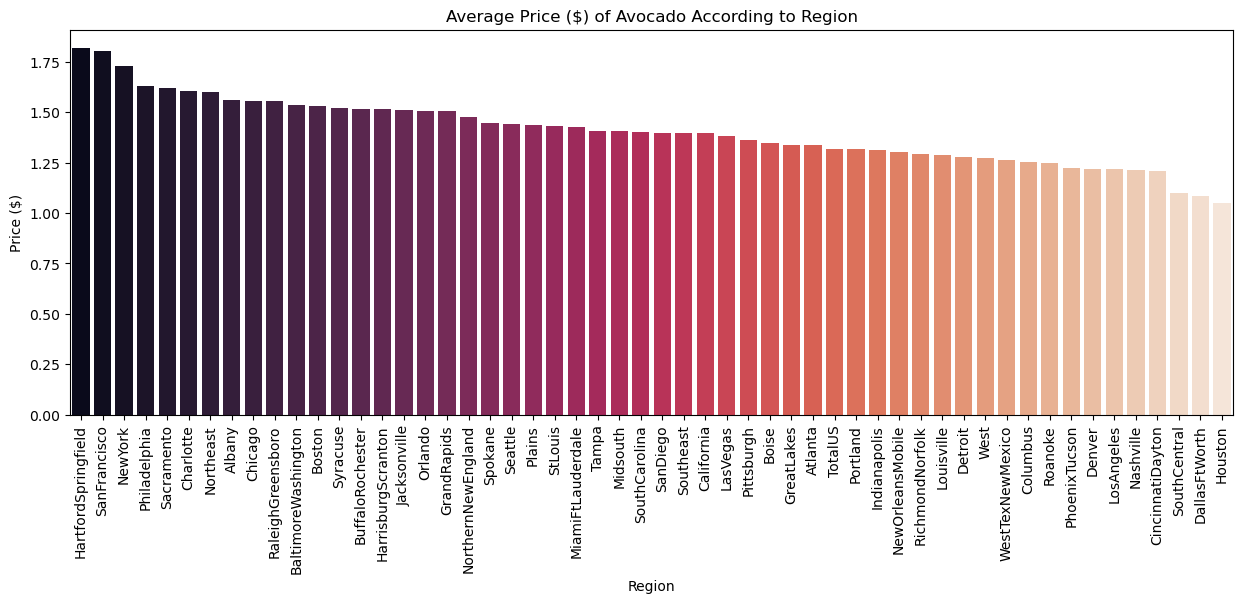

In [30]:
data1 = get_average_between_two_column(df, "region", "AveragePrice")
plot(data1, "Region", "Price ($)")

In [31]:
data1.head()

,column1,column2
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568


In [22]:
print(data1["column1"].iloc[-1], " is the region producing avocado with lowest price.")

Houston  is the region producing avocado with lowest price.


## What is the higest region of avocado production?
Checking if there are outlier values or not.

Text(0.5, 1.0, 'Figure: Boxplot representing outlier columns.')

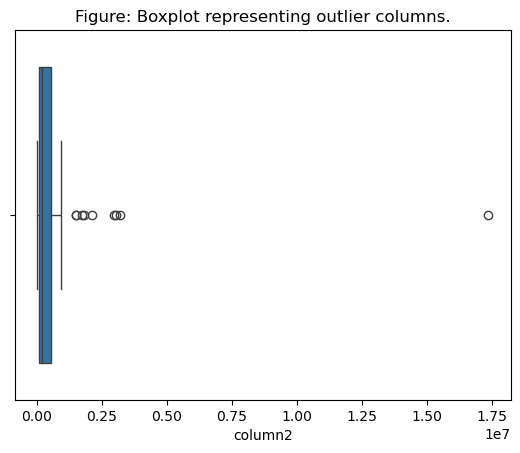

In [32]:
data2 = get_average_between_two_column(df, 'region', "Total Volume")
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot representing outlier columns.")

In [33]:
outlier_region = data2[data2.column2 >10000000]
print(outlier_region["column1"].iloc[-1], "is outlier value")

TotalUS is outlier value


## Remove the outlier values

In [34]:
outlier_region.index
data = data2.drop(outlier_region.index, axis=0)

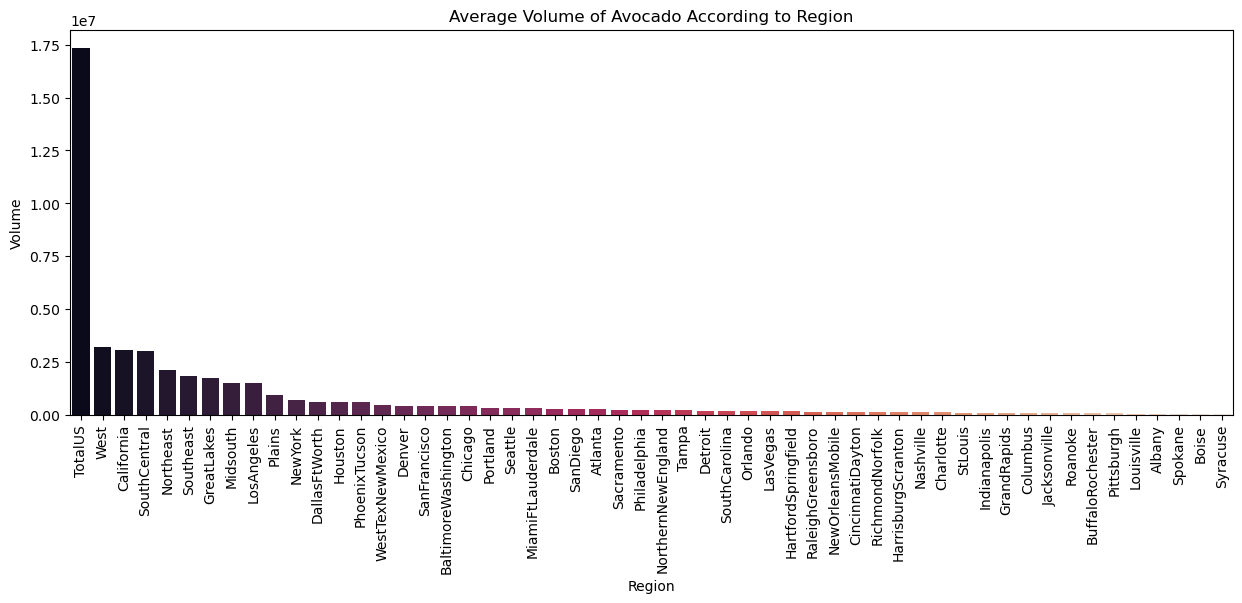

In [35]:
plot(data2, "Region", "Volume")

## What is the average avocado prices in each year?

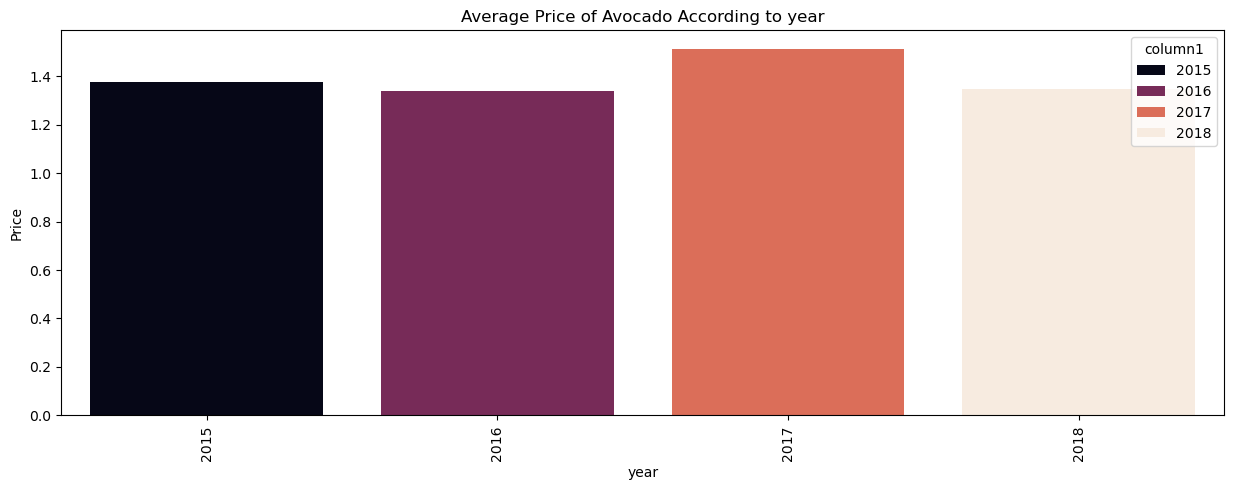

In [36]:
data3 = get_average_between_two_column(df, "year", "AveragePrice")
plot(data3, "year", "Price")

## What is the averaeg avocado valume in each year?

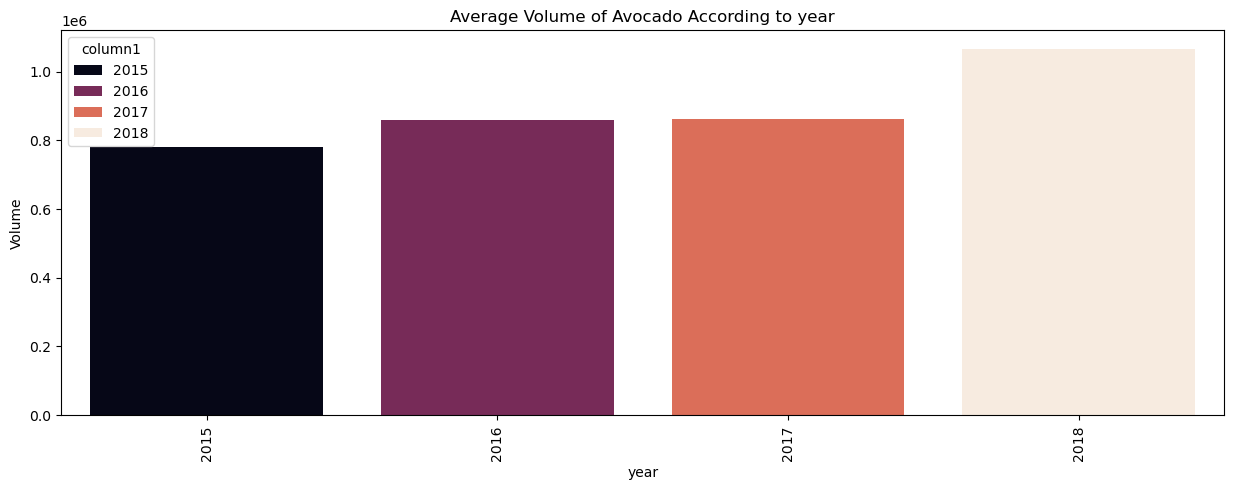

In [37]:
data4 = get_average_between_two_column(df, "year", "Total Volume")
plot(data4, "year", "Volume")

In [38]:
data4.head()

,column1,column2
3,2018,1.066928e+06
2,2017,8.623393e+05
1,2016,8.584206e+05
0,2015,7.810274e+05


# Data Modeling

we built the regression model by using Linear regression from sklearn to predict the avocado price.

## Change some column types to categories

In [39]:
df["region"] = df["region"].astype("category")
df["region"] = df["region"].cat.codes

df["type"] = df["type"].astype("category")
df["type"] = df["type"].cat.codes

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [43]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [44]:
X = df.drop(["AveragePrice"], axis=1)
y = df["AveragePrice"]

# Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=15
                                                   )

In [47]:
print(f"training set: {X_train.shape} - {y_train.shape[0]} samples")
print(f"testing set: {X_test. shape} - {y_test.shape[0]} samples")

training set: (12774, 8) - 12774 samples
testing set: (5475, 8) - 5475 samples


In [50]:
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

## Evaluate the results

In [51]:
test_pre = model.predict(X_test)
test_score = r2_score(y_test, test_pre)
print("The accuracy of testing dataset ", test_score*100)

The accuracy of testing dataset  38.58074176496377


In [54]:
# predition and calculate the accuracy for the training dataset
train_pre = model.predict(X_train)
train_score = r2_score(y_train, train_pre)
print("The accuracy of training dataset ", train_score*100)

The accuracy of training dataset  39.7068604240989


The model doesn't work wel lwith this dataset, in order to the avocado prices were near together